## NYC Parking Tickets

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("NYC Psrking Tickets") \
    .getOrCreate()

In [2]:
# SparkSession object has created.
spark

### Create DataFrame

In [3]:
# Data can be convert into DataFrame
# Datafram can be created by calling read method on spark object

df = spark.read.format("csv").load("/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")
df

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string]

In [4]:
# printSchema returns schema in tree format

df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)



In [5]:
df.show(2)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|           _c0|     _c1|               _c2|       _c3|           _c4|              _c5|         _c6|               _c7|            _c8|           _c9|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
only showing top 2 rows



In [6]:
# Rename the column
from pyspark.sql.functions import col

df = df.select(col("_c0").alias("Summons_Number"), col("_c1").alias("Plate_ID"), col("_c2").alias("Registration_State"), col("_c3").alias("Issue_Date"), col("_c4").alias("Violation_Code"), col("_c5").alias("Vehicle_Body_Type"), col("_c6").alias("Vehicle_Make"), col("_c7").alias("Violation_Precinct"), col("_c8").alias("Issuer_Precinct"), col("_c9").alias("Violation_Time"))
df.show()

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23|             5|             SUBN|

In [7]:
df.printSchema()

root
 |-- Summons_Number: string (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: string (nullable = true)
 |-- Violation_Code: string (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: string (nullable = true)
 |-- Issuer_Precinct: string (nullable = true)
 |-- Violation_Time: string (nullable = true)



In [8]:
# here you can check how many records present in the DataFrame.

from pyspark.sql.functions import count
df.select(count("Summons_Number")).show()

+---------------------+
|count(Summons_Number)|
+---------------------+
|             10803029|
+---------------------+



In [9]:
df1 =df.limit(1)

In [10]:
df1.show()

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



In [10]:
df2 = df.subtract(df1)

In [12]:
df2.show(2)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    1256447584| HFE6434|                NY|2016-08-13|            19|             SUBN|       VOLKS|               110|            976|         1225A|
|    1259387525|  8AAED7|                CT|2017-01-27|            38|              SDN|       DODGE|                 1|              0|         0625P|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
only showing top 2 rows



In [13]:
df2.printSchema()

root
 |-- Summons_Number: string (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: string (nullable = true)
 |-- Violation_Code: string (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: string (nullable = true)
 |-- Issuer_Precinct: string (nullable = true)
 |-- Violation_Time: string (nullable = true)



In [11]:
# How to change data type of the column?
# Use col method and pass column name and use cast method and pass datatype.
# Here we are creating another column and changing the data type string to bigint.
# Changing column types
df2 = df2.withColumn("Summons_Number", col("Summons_Number").cast("bigint"))

In [15]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: string (nullable = true)
 |-- Violation_Code: string (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: string (nullable = true)
 |-- Issuer_Precinct: string (nullable = true)
 |-- Violation_Time: string (nullable = true)



In [12]:
from pyspark.sql.functions import *

In [13]:
df2 = df2.withColumn("Issue_Date", to_timestamp(df2['Issue_Date'] , 'yyyy-MM-dd').alias('Issue_Date'))

In [18]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: string (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: string (nullable = true)
 |-- Issuer_Precinct: string (nullable = true)
 |-- Violation_Time: string (nullable = true)



In [14]:
df2 = df2.withColumn("Violation_Code", col("Violation_Code").cast("int"))

In [20]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: string (nullable = true)
 |-- Issuer_Precinct: string (nullable = true)
 |-- Violation_Time: string (nullable = true)



In [15]:
df2 = df2.withColumn("Violation_Precinct", col("Violation_Precinct").cast("int"))

In [22]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: string (nullable = true)
 |-- Violation_Time: string (nullable = true)



In [16]:
df2 = df2.withColumn("Issuer_Precinct", col("Issuer_Precinct").cast("int"))

In [24]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- Violation_Time: string (nullable = true)



converted datatypes as per data set available in https://www.kaggle.com/new-york-city/nyc-parking-tickets/data URL. I think, now the data is ready for analysis.

In [17]:
# df2 dataFrame - we are creating temporary view by using registerTempTable method.
#we will also register this as a temporary view so that we can query it with SQL and show off basic transformations in SQL
df2.registerTempTable("df2_table")

### Examine the data

1. Find the total number of tickets for the year.

In [18]:
# assumption - In problem statement, you have mentioned and shared to us 2017 year data. so I am counting, how many records present in the given dataframe.
df2.select(count("Summons_Number")).show()

+---------------------+
|count(Summons_Number)|
+---------------------+
|             10803028|
+---------------------+



Total number of records present in the give data frame is 10803027. More than 1 crore records.

---------------------------------------------------------------------------------------------------------------------
2. Find out the number of unique states from where the cars that got parking tickets came. (Hint: Use the column 'Registration State'.)

*There is a numeric entry '99' in the column, which should be corrected. Replace it with the state having the maximum entries. Provide the number of unique states again.*

1. finding number of distinct registration state
2. group the registration state and count number of records persent for each group.
3. sort registration state and find out '99' registration state.
4. assign this dataframe to another dataframe and replace 99 registration state to NY because NY has more number of records.

In [27]:
df2.select(countDistinct("Registration_State")).show()

+----------------------------------+
|count(DISTINCT Registration_State)|
+----------------------------------+
|                                68|
+----------------------------------+



In [28]:
countDistinctDF_sql = spark.sql("SELECT Registration_State, count(Registration_State) as distinct_reg_state FROM df2_table GROUP BY Registration_State")

In [29]:
c_d_f_s = countDistinctDF_sql.sort(countDistinctDF_sql.Registration_State)

In [30]:
c_d_f_s.show(70)

+------------------+------------------+
|Registration_State|distinct_reg_state|
+------------------+------------------+
|                99|             36625|
|                AB|               218|
|                AK|               754|
|                AL|              6891|
|                AR|              2621|
|                AZ|             26426|
|                BC|               127|
|                CA|             24260|
|                CO|              4093|
|                CT|            141088|
|                DC|              4250|
|                DE|             16325|
|                DP|              3192|
|                FL|            144556|
|                FO|                12|
|                GA|             36852|
|                GV|               704|
|                HI|               408|
|                IA|              4186|
|                ID|              2920|
|                IL|             37329|
|                IN|             80749|


NY registration state has more number of records in the given data frame. NY has 8481060 records. 
99 record is also showing. So, Need to replace 99 with NY.

In [19]:
df2 = df2.withColumn("Registration_State", \
              when(df2["Registration_State"] == 99, "NY").otherwise(df2["Registration_State"]))

In [20]:
# df2 dataFrame - we are creating temporary view by using registerTempTable method.
#we will also register this as a temporary view so that we can query it with SQL and show off basic transformations in SQL

df2.registerTempTable("df2_table")

In [21]:
countDistinctDF_sql1 = spark.sql("SELECT Registration_State, count(Registration_State) as distinct_reg_state FROM df2_table GROUP BY Registration_State")

In [22]:
c_d_f_s1 = countDistinctDF_sql1.sort(countDistinctDF_sql1.Registration_State)

In [23]:
c_d_f_s1.show(70)

+------------------+------------------+
|Registration_State|distinct_reg_state|
+------------------+------------------+
|                AB|               218|
|                AK|               754|
|                AL|              6891|
|                AR|              2621|
|                AZ|             26426|
|                BC|               127|
|                CA|             24260|
|                CO|              4093|
|                CT|            141088|
|                DC|              4250|
|                DE|             16325|
|                DP|              3192|
|                FL|            144556|
|                FO|                12|
|                GA|             36852|
|                GV|               704|
|                HI|               408|
|                IA|              4186|
|                ID|              2920|
|                IL|             37329|
|                IN|             80749|
|                KS|              1501|


99 Registration state has replaced with NY Registration state. Now NY records count increased from 8481061 to 8517686

In [36]:
c_d_f_s1.select(count("Registration_State")).show()

+-------------------------+
|count(Registration_State)|
+-------------------------+
|                       67|
+-------------------------+



So 67 unique regitration states are available.

-----------------------------------------------------------------------------------------------------------------------

### Aggregation tasks

1. How often does each violation code occur? Display the frequency of the top five violation codes.

In [37]:
countDistinctDF_VC = spark.sql("SELECT Violation_Code, count(Violation_Code) as distinct_violation_code FROM df2_table GROUP BY Violation_Code")

In [38]:
c_d_f_vc = countDistinctDF_VC.sort(desc("distinct_violation_code"))

In [39]:
c_d_f_vc.show(10)

+--------------+-----------------------+
|Violation_Code|distinct_violation_code|
+--------------+-----------------------+
|            21|                1528588|
|            36|                1400614|
|            38|                1062304|
|            14|                 893497|
|            20|                 618593|
|            46|                 600012|
|            37|                 596769|
|            71|                 521308|
|            40|                 519615|
|             7|                 516395|
+--------------+-----------------------+
only showing top 10 rows



Violation codes 21,36,38,14,20 are the most frequency occured.

In [40]:
top_5_VC = c_d_f_vc.limit(5)

In [41]:
top_5_VC.show()

+--------------+-----------------------+
|Violation_Code|distinct_violation_code|
+--------------+-----------------------+
|            21|                1528588|
|            36|                1400614|
|            38|                1062304|
|            14|                 893498|
|            20|                 618593|
+--------------+-----------------------+



In [42]:
total_no_of_days_2017 = 365

In [43]:
top_5_VC.select(top_5_VC.Violation_Code, top_5_VC.distinct_violation_code,(top_5_VC.distinct_violation_code/total_no_of_days_2017).alias('frequency_of_occurance')).show()

+--------------+-----------------------+----------------------+
|Violation_Code|distinct_violation_code|frequency_of_occurance|
+--------------+-----------------------+----------------------+
|            21|                1528588|     4187.912328767124|
|            36|                1400613|    3837.2958904109587|
|            38|                1062304|    2910.4219178082194|
|            14|                 893498|    2447.9397260273972|
|            20|                 618593|    1694.7753424657535|
+--------------+-----------------------+----------------------+



21 violation code is occuring approximately 4188 per day.<br>
36 violation code is occuring approximately 3837 per day.<br>
38 violation code is occuring approximately 2910 per day.<br>
14 violation code is occuring approximately 2448 per day.<br>
20 violation code is occuring approximately 1695 per day.<br>

-----------------------------------------------------------------------------------------------------------------------

2. How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'? (Hint: Find the top 5 for both.)

In [44]:
countDistinctDF_VBT = spark.sql("SELECT Vehicle_Body_Type, count(Vehicle_Body_Type) as distinct_violation_body_type FROM df2_table GROUP BY Vehicle_Body_Type")

In [45]:
c_d_f_vbt = countDistinctDF_VBT.sort(desc("distinct_violation_body_type"))

In [46]:
c_d_f_vbt.show(10)

+-----------------+----------------------------+
|Vehicle_Body_Type|distinct_violation_body_type|
+-----------------+----------------------------+
|             SUBN|                     3719802|
|             4DSD|                     3082020|
|              VAN|                     1411970|
|             DELV|                      687330|
|              SDN|                      438190|
|             2DSD|                      274380|
|             PICK|                      262618|
|             REFG|                       99187|
|             TRAC|                       72608|
|             TAXI|                       61866|
+-----------------+----------------------------+
only showing top 10 rows



In [47]:
top_5_VBT = c_d_f_vbt.limit(5)

In [48]:
top_5_VBT.show()

+-----------------+----------------------------+
|Vehicle_Body_Type|distinct_violation_body_type|
+-----------------+----------------------------+
|             SUBN|                     3719802|
|             4DSD|                     3082020|
|              VAN|                     1411970|
|             DELV|                      687330|
|              SDN|                      438190|
+-----------------+----------------------------+



In [49]:
top_5_VBT.select(top_5_VBT.Vehicle_Body_Type, top_5_VBT.distinct_violation_body_type,(top_5_VBT.distinct_violation_body_type/total_no_of_days_2017).alias('frequency_of_occurance')).show()

+-----------------+----------------------------+----------------------+
|Vehicle_Body_Type|distinct_violation_body_type|frequency_of_occurance|
+-----------------+----------------------------+----------------------+
|             SUBN|                     3719801|    10191.235616438356|
|             4DSD|                     3082020|     8443.890410958904|
|              VAN|                     1411970|    3868.4109589041095|
|             DELV|                      687330|    1883.0958904109589|
|              SDN|                      438191|    1200.5232876712328|
+-----------------+----------------------------+----------------------+



SUBN violation body type is occuring approximately 10191 per day.<br>
4DSD violation body type is occuring approximately 8443 per day.<br>
VAN violation body type is occuring approximately 3868 per day.<br>
DELV violation body type is occuring approximately 1883 per day.<br>
SDN violation body type is occuring approximately 1200 per day.

In [50]:
countDistinctDF_VM = spark.sql("SELECT Vehicle_Make, count(Vehicle_Make) as distinct_violation_make FROM df2_table GROUP BY Vehicle_Make")

In [51]:
c_d_f_vm = countDistinctDF_VM.sort(desc("distinct_violation_make"))

In [52]:
c_d_f_vm.show(10)

+------------+-----------------------+
|Vehicle_Make|distinct_violation_make|
+------------+-----------------------+
|        FORD|                1280958|
|       TOYOT|                1211451|
|       HONDA|                1079238|
|       NISSA|                 918590|
|       CHEVR|                 714655|
|       FRUEH|                 429158|
|       ME/BE|                 389051|
|         BMW|                 374929|
|       DODGE|                 372127|
|        JEEP|                 348145|
+------------+-----------------------+
only showing top 10 rows



In [53]:
top_5_VM = c_d_f_vm.limit(5)

In [54]:
top_5_VM.show()

+------------+-----------------------+
|Vehicle_Make|distinct_violation_make|
+------------+-----------------------+
|        FORD|                1280958|
|       TOYOT|                1211451|
|       HONDA|                1079238|
|       NISSA|                 918590|
|       CHEVR|                 714655|
+------------+-----------------------+



In [55]:
top_5_VM.select(top_5_VM.Vehicle_Make, top_5_VM.distinct_violation_make,(top_5_VM.distinct_violation_make/total_no_of_days_2017).alias('frequency_of_occurance')).show()

+------------+-----------------------+----------------------+
|Vehicle_Make|distinct_violation_make|frequency_of_occurance|
+------------+-----------------------+----------------------+
|        FORD|                1280957|    3509.4712328767123|
|       TOYOT|                1211451|     3319.043835616438|
|       HONDA|                1079238|    2956.8164383561643|
|       NISSA|                 918590|    2516.6849315068494|
|       CHEVR|                 714655|     1957.958904109589|
+------------+-----------------------+----------------------+



FORD violation make is occuring approximately 3509 per day.<br>
TOYOT violation make is occuring approximately 3319 per day.<br>
HONDA violation make is occuring approximately 2957 per day.<br>
NISSA violation make is occuring approximately 2517 per day.<br>
CHEVR violation make is occuring approximately 1958 per day.<br>

-----------------------------------------------------------------------------------------------------------------------

3. A precinct is a police station that has a certain zone of the city under its command. Find the (5 highest) frequencies of tickets for each of the following:

   1. 'Violation Precinct' (This is the precinct of the zone where the violation occurred). Using this, can you draw any insights for parking violations in any specific areas of the city?
   
   2. 'Issuer Precinct' (This is the precinct that issued the ticket.)
    Here, you would have noticed that the dataframe has the'Violating Precinct' or 'Issuing Precinct' as '0'. These are erroneous entries. Hence, you need to provide the records for five correct precincts. (Hint: Print the top six entries after sorting.)

In [56]:
countDistinctDF_VP = spark.sql("SELECT Registration_State, count(Violation_Precinct) as distinct_violation_precinct FROM df2_table GROUP BY Registration_State")

In [57]:
c_d_f_vp = countDistinctDF_VP.sort(desc("distinct_violation_precinct"))

In [58]:
c_d_f_vp.show(5)

+------------------+---------------------------+
|Registration_State|distinct_violation_precinct|
+------------------+---------------------------+
|                NY|                    8517685|
|                NJ|                     925965|
|                PA|                     285419|
|                FL|                     144556|
|                CT|                     141088|
+------------------+---------------------------+
only showing top 5 rows



We can see NY, NJ, PA, FL, CT are the top 5 cities are violating parking rules.

In [59]:
countDistinctDF_IP = spark.sql("SELECT Issuer_Precinct, count(Issuer_Precinct) as distinct_issuer_precinct FROM df2_table GROUP BY Issuer_Precinct")

In [60]:
c_d_f_ip = countDistinctDF_IP.sort(desc("distinct_issuer_precinct"))

In [61]:
c_d_f_ip.show(6)

+---------------+------------------------+
|Issuer_Precinct|distinct_issuer_precinct|
+---------------+------------------------+
|              0|                 2388479|
|             19|                  521513|
|             14|                  344977|
|              1|                  321170|
|             18|                  296553|
|            114|                  289950|
+---------------+------------------------+
only showing top 6 rows



Yeah, first record is showing 0 in Issuer_Precinct.

In [62]:
c_d_f_ip1 = c_d_f_ip.limit(1)

In [63]:
c_d_f_ip = c_d_f_ip.subtract(c_d_f_ip1)

In [64]:
c_d_f_ip.show(6)

+---------------+------------------------+
|Issuer_Precinct|distinct_issuer_precinct|
+---------------+------------------------+
|             19|                  521513|
|             14|                  344977|
|              1|                  321170|
|             18|                  296553|
|            114|                  289950|
|             13|                  240833|
+---------------+------------------------+
only showing top 6 rows



In [65]:
countDistinctDF_VP1 = spark.sql("SELECT Violation_Precinct, count(Violation_Precinct) as distinct_violation_precinct FROM df2_table GROUP BY Violation_Precinct")

In [66]:
c_d_f_vp1 = countDistinctDF_VP1.sort(desc("distinct_violation_precinct"))

In [67]:
c_d_f_vp1.show(6)

+------------------+---------------------------+
|Violation_Precinct|distinct_violation_precinct|
+------------------+---------------------------+
|                 0|                    2072400|
|                19|                     535671|
|                14|                     352450|
|                 1|                     331810|
|                18|                     306920|
|               114|                     296514|
+------------------+---------------------------+
only showing top 6 rows



Yeah, first record is showing 0 in Violation_Precinct.

In [68]:
c_d_f_vp2 = c_d_f_vp1.limit(1)

In [69]:
c_d_f_vp1 = c_d_f_vp1.subtract(c_d_f_vp2)

In [70]:
c_d_f_vp1.show(6)

+------------------+---------------------------+
|Violation_Precinct|distinct_violation_precinct|
+------------------+---------------------------+
|                19|                     535671|
|                14|                     352450|
|                 1|                     331810|
|                18|                     306920|
|               114|                     296514|
|                13|                     246595|
+------------------+---------------------------+
only showing top 6 rows



-----------------------------------------------------------------------------------------------------------------------

4. Find the violation code frequencies for three precincts that have issued the most number of tickets. Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts? 
(Hint: In the SQL view, use the 'where' attribute to filter among three precincts.)

1. first findout number of violation precinct occured for each code qnd then divide by total number of days in 2017. You get frequency of occurance - How many number of violation precient occurred in a day. Similarly find out for Issuer percinct and check the codes between violation percient and issuer percient.

In [71]:
countDistinctDF_VCF = spark.sql("SELECT Violation_Code, count(Violation_Precinct) as distinct_violation_precinct FROM df2_table GROUP BY Violation_Code")

In [72]:
c_d_f_vcf1 = countDistinctDF_VCF.sort(desc("distinct_violation_precinct"))

In [73]:
c_d_f_vcf1.show(6)

+--------------+---------------------------+
|Violation_Code|distinct_violation_precinct|
+--------------+---------------------------+
|            21|                    1528588|
|            36|                    1400614|
|            38|                    1062304|
|            14|                     893497|
|            20|                     618593|
|            46|                     600012|
+--------------+---------------------------+
only showing top 6 rows



In [74]:
c_d_f_vcf1.select(c_d_f_vcf1.Violation_Code, c_d_f_vcf1.distinct_violation_precinct,(c_d_f_vcf1.distinct_violation_precinct/total_no_of_days_2017).alias('frequency_of_occurance')).show(3)

+--------------+---------------------------+----------------------+
|Violation_Code|distinct_violation_precinct|frequency_of_occurance|
+--------------+---------------------------+----------------------+
|            21|                    1528588|     4187.912328767124|
|            36|                    1400614|    3837.2986301369865|
|            38|                    1062304|    2910.4219178082194|
+--------------+---------------------------+----------------------+
only showing top 3 rows



In [75]:
countDistinctDF_VCF2 = spark.sql("SELECT Violation_Code, count(Issuer_Precinct) as distinct_issuer_precinct FROM df2_table GROUP BY Violation_Code")

In [76]:
c_d_f_vcf2 = countDistinctDF_VCF2.sort(desc("distinct_issuer_precinct"))

In [77]:
c_d_f_vcf2.show(6)

+--------------+------------------------+
|Violation_Code|distinct_issuer_precinct|
+--------------+------------------------+
|            21|                 1528588|
|            36|                 1400614|
|            38|                 1062304|
|            14|                  893497|
|            20|                  618593|
|            46|                  600012|
+--------------+------------------------+
only showing top 6 rows



In [78]:
c_d_f_vcf2.select(c_d_f_vcf2.Violation_Code, c_d_f_vcf2.distinct_issuer_precinct,(c_d_f_vcf2.distinct_issuer_precinct/total_no_of_days_2017).alias('frequency_of_occurance')).show(3)

+--------------+------------------------+----------------------+
|Violation_Code|distinct_issuer_precinct|frequency_of_occurance|
+--------------+------------------------+----------------------+
|            21|                 1528588|     4187.912328767124|
|            36|                 1400614|    3837.2986301369865|
|            38|                 1062304|    2910.4219178082194|
+--------------+------------------------+----------------------+
only showing top 3 rows



21,36 and 38 are most frequently violation codes.

In [40]:
#whereDF = df2.where((col("Violation_Code") == 21) | (col("Violation_Code") == 36) | (col("Violation_Code") == 38)).sort("Violation_Code")

In [41]:
#whereDF1 =df2.select("Violation_Code", "Registration_State").where((col("Violation_Code") == 21) | (col("Violation_Code") == 36) | (col("Violation_Code") == 38)).sort("Violation_Code")

In [46]:
#whereDF2 = whereDF1.groupBy("Violation_Code")

5. Find out the properties of parking violations across different times of the day:

    1. Find a way to deal with missing values, if any.
    (Hint: Check for the null values using 'isNull' under the SQL. Also, to remove the null values, check the 'dropna' command in the API documentation.)

In [24]:
MissingValuesDF = df2.filter(col("Summons_Number").isNull() | col("Plate_ID").isNull() | col("Registration_State").isNull() | col("Issue_Date").isNull() | col("Violation_Code").isNull() | col("Vehicle_Body_Type").isNull() | col("Vehicle_Make").isNull() | col("Violation_Precinct").isNull() | col("Issuer_Precinct").isNull() | col("Violation_Time").isNull())

In [25]:
MissingValuesDF.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|          null|Plate ID|Registration State|      null|          null|Vehicle Body Type|Vehicle Make|              null|           null|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



In [26]:
#Drop records with null value
df2 = df2.na.drop()

In [27]:
MissingValuesDF = df2.filter(col("Summons_Number").isNull() | col("Plate_ID").isNull() | col("Registration_State").isNull() | col("Issue_Date").isNull() | col("Violation_Code").isNull() | col("Vehicle_Body_Type").isNull() | col("Vehicle_Make").isNull() | col("Violation_Precinct").isNull() | col("Issuer_Precinct").isNull() | col("Violation_Time").isNull())

In [28]:
MissingValuesDF.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



Now no missing values in df2 dataframe.

B. The Violation Time field is specified in a strange format. Find a way to make this a time attribute that you can use to divide into groups.

In [29]:
tt = df2

In [30]:
df2 = df2.select(df2["Summons_Number"],df2["Plate_ID"],df2["Registration_State"],df2["Issue_Date"],df2["Violation_Code"],df2["Vehicle_Body_Type"],df2["Vehicle_Make"],df2["Violation_Precinct"],df2["Issuer_Precinct"],substring(df2.Violation_Time, 1, 2).alias('hours'),substring(df2.Violation_Time, 3, 2).alias('Mins'), substring(df2.Violation_Time, 5, 1).alias('AMPM'), df2.Violation_Time )

In [31]:
df2 = df2.withColumn("AMPM", when(col("AMPM") == "A", "AM")
                                   .otherwise("PM")
                           );

In [84]:
df2.select(df2["Summons_Number"],df2["Plate_ID"],df2["Registration_State"],df2["Issue_Date"],df2["Violation_Code"],df2["Vehicle_Body_Type"],df2["Vehicle_Make"],df2["Violation_Precinct"],df2["Issuer_Precinct"],df2["hours"],df2["Mins"], df2["AMPM"], df2.Violation_Time ).show()

+--------------+----------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+-----+----+----+--------------+
|Summons_Number|  Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|hours|Mins|AMPM|Violation_Time|
+--------------+----------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+-----+----+----+--------------+
|    1082331053|   GUR1870|                NY|2016-09-05 00:00:00|            17|              SDN|       HYUND|                71|            976|   07|  30|  AM|         0730A|
|    1158077610|BLANKPLATE|                NY|2016-11-28 00:00:00|            77|              BUS|       INTER|               101|            968|   10|  20|  AM|         1020A|
|    1256447663|  T513505C|                NY|2016-07-26 00:00:00|            20|             TAXI|      

In [32]:
df2 = df2.withColumn("hours", when(col("AMPM") == "PM", df2["hours"]+12)
                                   .otherwise(col("hours"))
                           );

In [33]:
df2 = df2.withColumn("hours", col("hours").cast("int"))

In [34]:
df2 = df2.select(df2["Summons_Number"],df2["Plate_ID"],df2["Registration_State"],df2["Issue_Date"],df2["Violation_Code"],df2["Vehicle_Body_Type"],df2["Vehicle_Make"],df2["Violation_Precinct"],df2["Issuer_Precinct"],df2["hours"],df2["Mins"], df2["AMPM"],concat_ws(':', df2["hours"], df2["Mins"]).alias('VT_Date_Time'), df2.Violation_Time )

In [88]:
df2.select(df2["VT_Date_Time"],df2["hours"],df2["Mins"], df2["AMPM"],df2["Violation_Time"]).show(5)

+------------+-----+----+----+--------------+
|VT_Date_Time|hours|Mins|AMPM|Violation_Time|
+------------+-----+----+----+--------------+
|       12:25|   12|  25|  AM|         1225A|
|       18:25|   18|  25|  PM|         0625P|
|       17:45|   17|  45|  PM|         0545P|
|       12:25|   12|  25|  AM|         1225A|
|        9:05|    9|  05|  AM|         0905A|
+------------+-----+----+----+--------------+
only showing top 5 rows



Now VT_Date_Time is coming in 24 hours time format. I will convert into string format to timestamp format.

In [89]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- VT_Date_Time: string (nullable = false)
 |-- Violation_Time: string (nullable = true)



In [35]:
df2 = df2.withColumn("VT_Date_Time", to_timestamp(df2['VT_Date_Time'] , 'HH:mm'))

In [91]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- VT_Date_Time: timestamp (nullable = true)
 |-- Violation_Time: string (nullable = true)



Now VT_Date_Time is timestamp column.

C. Divide 24 hours into six equal discrete bins of time. Choose the intervals as you see fit. For each of these groups, find the three most commonly occurring violations.

In [36]:
tt = df2

In [37]:
df2 = df2.select(
    df2["Summons_Number"].alias("Summons_Number"),
    df2["Plate_ID"].alias("Plate_ID"),
    df2["Registration_State"].alias("Registration_State"),
    df2["Issue_Date"].alias("Issue_Date"),
    df2["Violation_Code"].alias("Violation_Code"),
    df2["Vehicle_Body_Type"].alias("Vehicle_Body_Type"),
    df2["Vehicle_Make"].alias("Vehicle_Make"),
    df2["Violation_Precinct"].alias("Violation_Precinct"),
    df2["Issuer_Precinct"].alias("Issuer_Precinct"),
    df2["hours"].alias("hours"),
    df2["Mins"].alias("Mins"),
    df2["AMPM"].alias("AMPM"),
    df2["hours"].alias("h"),
    df2["Mins"].alias("m"),
    df2["VT_Date_Time"].alias("VT_Date_Time"),
    df2["Violation_Time"].alias("Violation_Time"))\
  .selectExpr(
    "Summons_Number",
    "Plate_ID",
    "Registration_State",
    "Issue_Date",
    "Violation_Code",
    "Vehicle_Body_Type",
    "Vehicle_Make",
    "Violation_Precinct",
    "Issuer_Precinct",
    "hours",
    "Mins",
    "AMPM",
    "h*60+m",
    "VT_Date_Time",
    "Violation_Time")

In [94]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- ((h * 60) + m): double (nullable = true)
 |-- VT_Date_Time: timestamp (nullable = true)
 |-- Violation_Time: string (nullable = true)



In [38]:
tt = df2

In [39]:
df2 = df2.withColumn("Total_Mins", col("((h * 60) + m)").cast("int"))

In [97]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- ((h * 60) + m): double (nullable = true)
 |-- VT_Date_Time: timestamp (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Total_Mins: integer (nullable = true)



In [98]:
df2.select(df2["((h * 60) + m)"], df2["Total_Mins"]).show(10)

+--------------+----------+
|((h * 60) + m)|Total_Mins|
+--------------+----------+
|         828.0|       828|
|        1347.0|      1347|
|         935.0|       935|
|         644.0|       644|
|         215.0|       215|
|        1469.0|      1469|
|         945.0|       945|
|         602.0|       602|
|         443.0|       443|
|         606.0|       606|
+--------------+----------+
only showing top 10 rows



now dropping ((h * 60) + m) column in df2 dataframe.

In [40]:
df2 = df2.drop("((h * 60) + m)")

In [100]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- VT_Date_Time: timestamp (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Total_Mins: integer (nullable = true)



In [41]:
df2.registerTempTable("df2_table")

In [42]:
df2 = df2.withColumn("Bins",expr("CASE WHEN Total_Mins > 0 and Total_Mins < 240 THEN  'bin1' WHEN Total_Mins >= 240 and Total_Mins < 480 THEN  'bin2' WHEN Total_Mins >= 480 and Total_Mins < 720 THEN  'bin3' WHEN Total_Mins >= 720 and Total_Mins < 960 THEN  'bin4' WHEN Total_Mins >= 960 and Total_Mins < 1200 THEN  'bin5' WHEN Total_Mins >= 1200 THEN  'bin6' ELSE 'other' END AS Bins"))

In [106]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- VT_Date_Time: timestamp (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Total_Mins: integer (nullable = true)
 |-- Bins: string (nullable = false)



In [43]:
tt = df2

In [105]:
spark.sql("SELECT * FROM df2_table").show(3)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+-----+----+----+-------------------+--------------+----------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|hours|Mins|AMPM|       VT_Date_Time|Violation_Time|Total_Mins|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+-----+----+----+-------------------+--------------+----------+
|    1076793800| 55645MJ|                NY|2016-09-13 00:00:00|            17|              VAN|       DODGE|                19|            335|   13|  48|  PM|1970-01-01 13:48:00|         0148P|       828|
|    1255357137| DOO3906|                OH|2016-07-29 00:00:00|            40|              nan|       HONDA|                43|             43|   22|  27|  PM|1970-01

In [155]:
df2 = df2.drop(df2.Bins == "other")

In [154]:
tt_df.filter(tt_df.Bins == "other").sort(tt_df.Bins).show(5)

+--------------+
|(Bins = other)|
+--------------+
|         false|
|         false|
|         false|
|         false|
|         false|
+--------------+
only showing top 5 rows



In [140]:
df2.registerTempTable("df2_table")

In [118]:
df2_bins = spark.sql("SELECT Bins, count(Bins) as count_bins FROM df2_table GROUP BY Bins")

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

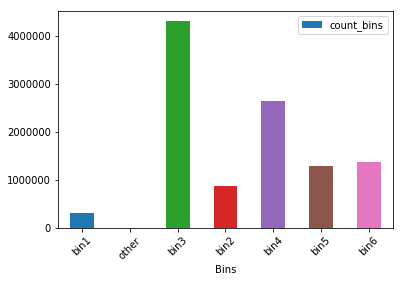

In [119]:
plt.clf()
pdDF = df2_bins.toPandas()
pdDF.plot(x='Bins', y='count_bins', kind='bar', rot=45)
plt.show()

bin3 time zone has occurring more number of parking tickets.
bin4 time zone has occurring next more number of parking tickets.

bin3 time zone is 480 mins to 720 mins. It is 8AM to 12PM.

-----------------------------------------------------------------------------------------------------------------------

D. Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).

we already know 21,36,38 are most commonly occuring violation codes.

In [142]:
df2_vc_bins = spark.sql("SELECT Violation_Code, Bins, count(Bins) as count_bins FROM df2_table WHERE Violation_Code in (21,36,38) GROUP BY Violation_Code, Bins ")

In [143]:
df2_vc_bins.sort("Violation_Code").show()

+--------------+-----+----------+
|Violation_Code| Bins|count_bins|
+--------------+-----+----------+
|            21| bin2|    119467|
|            21| bin6|    144081|
|            21| bin3|   1182682|
|            21| bin4|      8637|
|            21| bin5|       551|
|            21|other|       221|
|            21| bin1|     72949|
|            36| bin2|     33939|
|            36| bin5|     26858|
|            36| bin6|    211434|
|            36| bin3|    751422|
|            36| bin4|    376961|
|            38|other|         6|
|            38| bin3|    346518|
|            38| bin4|    356354|
|            38| bin5|    203232|
|            38| bin2|      2300|
|            38| bin1|       357|
|            38| bin6|    153537|
+--------------+-----+----------+



6. Let’s try and find some seasonality in this data:

    A. First, divide the year into a certain number of seasons, and find the frequencies of tickets for each season. (Hint: Use Issue Date to segregate into seasons.)

    B. Then, find the three most common violations for each of these seasons.
    (Hint: You can use an approach similar to the one mentioned in the hint for question 4.)

In [158]:
df2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- VT_Date_Time: timestamp (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Total_Mins: integer (nullable = true)
 |-- Bins: string (nullable = false)



In [159]:
spark.sql("SELECT Issue_Date FROM df2_table").show(3)

+-------------------+
|         Issue_Date|
+-------------------+
|2017-02-03 00:00:00|
|2016-09-14 00:00:00|
|2017-01-20 00:00:00|
+-------------------+
only showing top 3 rows



In [45]:
df6 = df2.select(df2["Summons_Number"],df2["Plate_ID"],df2["Registration_State"],df2["Issue_Date"],substring(df2.Issue_Date, 6, 2).alias('Month'),df2["Violation_Code"],df2["Vehicle_Body_Type"],df2["Vehicle_Make"],df2["Violation_Precinct"],df2["Issuer_Precinct"],df2["hours"],df2["Mins"],df2["AMPM"],df2["VT_Date_Time"], df2["Violation_Time"], df2["Total_Mins"], df2["Bins"])

In [165]:
df6.select(df6.Month).show(10)

+-----+
|Month|
+-----+
|   09|
|   11|
|   07|
|   03|
|   08|
|   10|
|   04|
|   02|
|   07|
|   01|
+-----+
only showing top 10 rows



In [46]:
df6 = df6.na.drop()

In [47]:
df6.registerTempTable("df6_table")

In [48]:
spark.sql("SELECT distinct(Month) FROM df6_table").show()

+-----+
|Month|
+-----+
|   07|
|   11|
|   01|
|   09|
|   05|
|   08|
|   03|
|   02|
|   06|
|   10|
|   12|
|   04|
+-----+



In [173]:
df6.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Month: string (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- VT_Date_Time: timestamp (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Total_Mins: integer (nullable = true)
 |-- Bins: string (nullable = false)



In [49]:
df6 = df6.withColumn("Month", col("Month").cast("int"))

In [50]:
df6 = df6.withColumn("Bins_Month",expr("CASE WHEN Month > 0 and Month <= 3 THEN  'month_bin1' WHEN Month > 3 and Month <= 6 THEN  'month_bin2' WHEN Month > 6 and Month <= 9 THEN  'month_bin3' WHEN Month > 9 and Month <= 12 THEN  'month_bin4' ELSE 'other' END AS Bins_Month"))

In [51]:
df6.registerTempTable("df6_table")

In [179]:
spark.sql("SELECT Bins_Month, count(Bins_Month) as count_bins FROM df6_table GROUP BY Bins_Month").show()

+----------+----------+
|Bins_Month|count_bins|
+----------+----------+
|month_bin4|   2404806|
|month_bin3|   2249517|
|month_bin2|   2736098|
|month_bin1|   2421726|
+----------+----------+



month_bin2 season has created more number of tickets. Almost all seasons are creating number of tickets.

month_bin2 is April, May and June months.

In [180]:
df6_vc_bins = spark.sql("SELECT Violation_Code, Bins_Month, count(Bins_Month) as count_bins FROM df6_table WHERE Violation_Code in (21,36,38) GROUP BY Violation_Code, Bins_Month ")

In [181]:
df6_vc_bins.sort("Violation_Code").show()

+--------------+----------+----------+
|Violation_Code|Bins_Month|count_bins|
+--------------+----------+----------+
|            21|month_bin3|    349519|
|            21|month_bin1|    338125|
|            21|month_bin2|    382609|
|            21|month_bin4|    314604|
|            36|month_bin3|    204431|
|            36|month_bin4|    375789|
|            36|month_bin1|    294218|
|            36|month_bin2|    314741|
|            38|month_bin1|    257858|
|            38|month_bin3|    221068|
|            38|month_bin4|    237974|
|            38|month_bin2|    238896|
+--------------+----------+----------+



In [185]:
df6_vc_month_bin1 = spark.sql("SELECT Violation_Code, Bins_Month, count(Violation_Code) as count_bins FROM df6_table WHERE Bins_Month = 'month_bin1' GROUP BY Violation_Code, Bins_Month ")

In [189]:
df6_vc_month_bin1.sort(desc("count_bins")).show(5)

+--------------+----------+----------+
|Violation_Code|Bins_Month|count_bins|
+--------------+----------+----------+
|            21|month_bin1|    338125|
|            36|month_bin1|    294218|
|            38|month_bin1|    257858|
|            14|month_bin1|    211187|
|            46|month_bin1|    140642|
+--------------+----------+----------+
only showing top 5 rows



21, 36 and 38 are more frequently exists in season January to March month (month_bin1).

In [190]:
df6_vc_month_bin2 = spark.sql("SELECT Violation_Code, Bins_Month, count(Violation_Code) as count_bins FROM df6_table WHERE Bins_Month = 'month_bin2' GROUP BY Violation_Code, Bins_Month ")

In [191]:
df6_vc_month_bin2.sort(desc("count_bins")).show(5)

+--------------+----------+----------+
|Violation_Code|Bins_Month|count_bins|
+--------------+----------+----------+
|            21|month_bin2|    382609|
|            36|month_bin2|    314741|
|            14|month_bin2|    246791|
|            38|month_bin2|    238896|
|            20|month_bin2|    166077|
+--------------+----------+----------+
only showing top 5 rows



21, 36 and 14 are more frequently exists in season April to June month (month_bin2).

In [192]:
df6_vc_month_bin3 = spark.sql("SELECT Violation_Code, Bins_Month, count(Violation_Code) as count_bins FROM df6_table WHERE Bins_Month = 'month_bin3' GROUP BY Violation_Code, Bins_Month ")

In [193]:
df6_vc_month_bin3.sort(desc("count_bins")).show(5)

+--------------+----------+----------+
|Violation_Code|Bins_Month|count_bins|
+--------------+----------+----------+
|            21|month_bin3|    349519|
|            38|month_bin3|    221068|
|            36|month_bin3|    204432|
|            14|month_bin3|    190076|
|            20|month_bin3|    133729|
+--------------+----------+----------+
only showing top 5 rows



21, 38 and 36 are more frequently exists in season July to September month (month_bin3).

In [52]:
df6_vc_month_bin4 = spark.sql("SELECT Violation_Code, Bins_Month, count(Violation_Code) as count_bins FROM df6_table WHERE Bins_Month = 'month_bin4' GROUP BY Violation_Code, Bins_Month ")

In [53]:
df6_vc_month_bin4.sort(desc("count_bins")).show(5)

+--------------+----------+----------+
|Violation_Code|Bins_Month|count_bins|
+--------------+----------+----------+
|            36|month_bin4|    375789|
|            21|month_bin4|    314604|
|            38|month_bin4|    237974|
|            14|month_bin4|    190475|
|            20|month_bin4|    137251|
+--------------+----------+----------+
only showing top 5 rows



36, 21 and 38 are more frequently exists in season October to December month (month_bin4).

7. The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes:

   A. Find the total occurrences of the three most common violation codes.
   B. Then, visit the website:
    http://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page
    It lists the fines associated with different violation codes. They’re divided into two categories: one for the highest-density locations in the city and the other for the rest of the city. For the sake of simplicity, take the average of the two.
   C. Using this information, find the total amount collected for the three violation codes with the maximum tickets. State the code that has the highest total collection.
   D. What can you intuitively infer from these findings?

In [71]:
ddddd = spark.sql("SELECT distinct(Violation_Code) as vc, count(Violation_Code) as cnt_vc FROM df6_table GROUP BY Violation_Code")

In [72]:
df6 = df6.withColumn("code_amount", expr("CASE WHEN Violation_Code = 1 THEN 515 WHEN Violation_Code = 2 THEN 515 WHEN Violation_Code = 3 THEN 515 WHEN Violation_Code = 4 THEN 115 WHEN Violation_Code = 5 THEN 515 WHEN Violation_Code = 6 THEN 390 WHEN Violation_Code = 7 THEN 50 WHEN Violation_Code = 8 THEN 115 WHEN Violation_Code = 9 THEN 115 WHEN Violation_Code = 10 THEN 115 WHEN Violation_Code = 11 THEN 115 WHEN Violation_Code = 12 THEN 1 WHEN Violation_Code = 13 THEN 115 WHEN Violation_Code = 14 THEN 115 WHEN Violation_Code = 15 THEN 95 WHEN Violation_Code = 16 THEN 95 WHEN Violation_Code = 17 THEN 95 WHEN Violation_Code = 18 THEN 115 WHEN Violation_Code = 19 THEN 115 WHEN Violation_Code = 20 THEN 62.5 WHEN Violation_Code = 21 THEN 55 WHEN Violation_Code = 22 THEN 115 WHEN Violation_Code = 23 THEN 1 WHEN Violation_Code = 24 THEN 1 WHEN Violation_Code = 25 THEN 115 WHEN Violation_Code = 26 THEN 115 WHEN Violation_Code = 27 THEN 180 WHEN Violation_Code = 28 THEN 95 WHEN Violation_Code = 29 THEN 515 WHEN Violation_Code = 30 THEN 515 WHEN Violation_Code = 31 THEN 115 WHEN Violation_Code = 32 THEN 50 WHEN Violation_Code = 33 THEN 1 WHEN Violation_Code = 34 THEN 1 WHEN Violation_Code = 35 THEN 50 WHEN Violation_Code = 36 THEN 50 WHEN Violation_Code = 37 THEN 50 WHEN Violation_Code = 38 THEN 50 WHEN Violation_Code = 39 THEN 62.5 WHEN Violation_Code = 40 THEN 115 WHEN Violation_Code = 41 THEN 1 WHEN Violation_Code = 42 THEN 50 WHEN Violation_Code = 43 THEN 1 WHEN Violation_Code = 44 THEN 50 WHEN Violation_Code = 45 THEN 115 WHEN Violation_Code = 46 THEN 115 WHEN Violation_Code = 47 THEN 115 WHEN Violation_Code = 48 THEN 115 WHEN Violation_Code = 49 THEN 95 WHEN Violation_Code = 50 THEN 115 WHEN Violation_Code = 51 THEN 115 WHEN Violation_Code = 52 THEN 115 WHEN Violation_Code = 53 THEN 115 WHEN Violation_Code = 54 THEN 115 WHEN Violation_Code = 55 THEN 115 WHEN Violation_Code = 56 THEN 115 WHEN Violation_Code = 57 THEN 65 WHEN Violation_Code = 58 THEN 55 WHEN Violation_Code = 59 THEN 115 WHEN Violation_Code = 60 THEN 55 WHEN Violation_Code = 61 THEN 55 WHEN Violation_Code = 62 THEN 55 WHEN Violation_Code = 63 THEN 95 WHEN Violation_Code = 64 THEN 95 WHEN Violation_Code = 65 THEN 95 WHEN Violation_Code = 66 THEN 55 WHEN Violation_Code = 67 THEN 165 WHEN Violation_Code = 68 THEN 65 WHEN Violation_Code = 69 THEN 65 WHEN Violation_Code = 70 THEN 65 WHEN Violation_Code = 71 THEN 65 WHEN Violation_Code = 72 THEN 65 WHEN Violation_Code = 73 THEN 65 WHEN Violation_Code = 74 THEN 65 WHEN Violation_Code = 75 THEN 95 WHEN Violation_Code = 76 THEN 1 WHEN Violation_Code = 77 THEN 55 WHEN Violation_Code = 78 THEN 65 WHEN Violation_Code = 79 THEN 115 WHEN Violation_Code = 80 THEN 55 WHEN Violation_Code = 81 THEN 95 WHEN Violation_Code = 82 THEN 115 WHEN Violation_Code = 83 THEN 65 WHEN Violation_Code = 84 THEN 55 WHEN Violation_Code = 85 THEN 65 WHEN Violation_Code = 86 THEN 115 WHEN Violation_Code = 87 THEN 1 WHEN Violation_Code = 88 THEN 1 WHEN Violation_Code = 89 THEN 115 WHEN Violation_Code = 90 THEN 1 WHEN Violation_Code = 91 THEN 55 WHEN Violation_Code = 92 THEN 55 WHEN Violation_Code = 93 THEN 65 WHEN Violation_Code = 94 THEN 150 WHEN Violation_Code = 95 THEN 1 WHEN Violation_Code = 96 THEN 95 WHEN Violation_Code = 97 THEN 55 WHEN Violation_Code = 98 THEN 95 WHEN Violation_Code = 99 THEN 1 ELSE 1 END AS code_amount"))

In [73]:
df6.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- VT_Date_Time: timestamp (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Total_Mins: integer (nullable = true)
 |-- Bins: string (nullable = false)
 |-- Bins_Month: string (nullable = false)
 |-- code_amount: decimal(11,1) (nullable = false)



In [75]:
df6.registerTempTable("df7_table")

In [80]:
df6 = df6.select(
    df6["Summons_Number"].alias("Summons_Number"),
    df6["Plate_ID"].alias("Plate_ID"),
    df6["Registration_State"].alias("Registration_State"),
    df6["Issue_Date"].alias("Issue_Date"),
    df6["Violation_Code"].alias("Violation_Code"),
    df6["Vehicle_Body_Type"].alias("Vehicle_Body_Type"),
    df6["Vehicle_Make"].alias("Vehicle_Make"),
    df6["Violation_Precinct"].alias("Violation_Precinct"),
    df6["Issuer_Precinct"].alias("Issuer_Precinct"),
    df6["hours"].alias("hours"),
    df6["Mins"].alias("Mins"),
    df6["AMPM"].alias("AMPM"),
    df6["hours"].alias("h"),
    df6["Mins"].alias("m"),
    df6["VT_Date_Time"].alias("VT_Date_Time"),
    df6["Violation_Time"].alias("Violation_Time"),
    df6["code_amount"].alias("ca"))\
  .selectExpr(
    "Summons_Number",
    "Plate_ID",
    "Registration_State",
    "Issue_Date",
    "Violation_Code",
    "Vehicle_Body_Type",
    "Vehicle_Make",
    "Violation_Precinct",
    "Issuer_Precinct",
    "hours",
    "Mins",
    "AMPM",    
    "VT_Date_Time",
    "Violation_Time",
    "Violation_Code*ca",)

In [81]:
df6.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- VT_Date_Time: timestamp (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- (Violation_Code * ca): decimal(22,1) (nullable = true)



In [87]:
df6.show(3)

+--------------+----------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+-----+----+----+-------------------+--------------+---------------------+
|Summons_Number|  Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|hours|Mins|AMPM|       VT_Date_Time|Violation_Time|(Violation_Code * ca)|
+--------------+----------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+-----+----+----+-------------------+--------------+---------------------+
|    1082331053|   GUR1870|                NY|2016-09-05 00:00:00|            17|              SDN|       HYUND|                71|            976|    7|  30|  AM|1970-01-01 07:30:00|         0730A|               1615.0|
|    1158077610|BLANKPLATE|                NY|2016-11-28 00:00:00|            77|              BUS|       INTER|    

In [88]:
df6 = df6.withColumn("total_amt", col("(Violation_Code * ca)").cast("float"))

In [89]:
df6.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- hours: integer (nullable = true)
 |-- Mins: string (nullable = true)
 |-- AMPM: string (nullable = false)
 |-- VT_Date_Time: timestamp (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- (Violation_Code * ca): decimal(22,1) (nullable = true)
 |-- total_amt: float (nullable = true)



In [94]:
df6.registerTempTable("df7_table")

In [95]:
spark.sql("SELECT * FROM df7_table").sort('Violation_Code').show(10)

+--------------+----------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+-----+----+----+-------------------+--------------+---------------------+---------+
|Summons_Number|  Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|hours|Mins|AMPM|       VT_Date_Time|Violation_Time|(Violation_Code * ca)|total_amt|
+--------------+----------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+-----+----+----+-------------------+--------------+---------------------+---------+
|    8574802270|   98826MB|                NY|2017-06-16 00:00:00|             0|             DELV|       ISUZU|               115|            115|   10|  03|  AM|1970-01-01 10:03:00|         1003A|                  0.0|      0.0|
|    8558911046|BLANKPLATE|                NY|2017-06-23 00:00:00|          

In [97]:
df7_total_amt = spark.sql("SELECT Violation_Code, sum(total_amt) as sum_total_amt FROM df7_table GROUP BY Violation_Code")

In [99]:
df7_total_amt.select(df7_total_amt.Violation_Code, df7_total_amt.sum_total_amt).sort(desc('sum_total_amt')).show(5)

+--------------+-------------+
|Violation_Code|sum_total_amt|
+--------------+-------------+
|            46|  2.8754324E9|
|            40|    2.25722E9|
|            71|2.192037315E9|
|            36|   2.140524E9|
|            38|  1.8160105E9|
+--------------+-------------+
only showing top 5 rows



46, 40 and 71 violation codes are getting more amount to the police department.

In [103]:
df7_total_amt.registerTempTable("df7_3_table")

In [104]:
spark.sql("SELECT sum(sum_total_amt) as 3_highest_total_amt FROM df7_3_table").show()

+-------------------+
|3_highest_total_amt|
+-------------------+
|    2.5066670939E10|
+-------------------+



What can you intuitively infer from these findings?

1. more number of tickets are occuring in between 8AM to 9 PM.
2. 21,38 and 36 violation codes occurred more number times.
3. But police department is getting more amount from 46,40 and 71 codes.    

In [216]:
spark.stop()